#  ROC and AUC ile Çok Sınıflı Sınıflandırma(MultiClass Classification)

<li><b><font color="Blue">İkili Sınıflandırma (Binary Classification) : </font></b> İki olasılık arasında sınıflandırma olarak tanımlanabilir. Örneğin; Bir kişinin kanser hastası olup olmaması.</li>
<li><b><font color="Blue">Sınıflandırma (Classification) : </font></b> İkiden fazla olasılık arasında sınıflandırma olarak tanımlanabilir. Örneğin; Örneğin resimdeki meyvenin; elma, armut veya şeftali olarak sınıflandırılması</li>
<li><b><font color="Blue">Regresyon (Regression) : </font></b> Sayısal olarak bir değerin tahmin edilmesi. Örneğin; bir şriketin verilerinin kullanılarak karlılığının tahmin edilmesi.</li>

# İkili Sınıflandırma ve ROC(Receiver Operating Characteristic) Eğrisi

İkili sınıflandırma yukarıda da bahsedildiği gibi iki olasılık arasında sınıflandırma olarak tanımlanabilmektedir. Örneğin; Doğru/Yanlış, Evet/Hayır, Uygun/Uygun Değil vb. </br>

Bir bankanın başvuran bir müşteriye kredi kartı çıkarıp çıkarmayacağına karar vermek için bir model oluşturulabilir. </br>

Bu noktada model değerlendirilirken göz önünde bulundurulacak amaç skor, false positive tahminlerin sayısı ile false negative tahminlerin sayılarıdır. <b>False Positive</b> ve <b>False Negative</b> hata türleridir. Kötü bir kredi riskine sahip kişiye kredi kartı vermek <i>False Positive</i> hatayı gösterir. İyi bir kredi riskine sahibi kişiye kredi kartı vermemek de <i>False Negative</i> hatayı gösterir. </br>

Bir ROC eğrisi, tüm sınıflandırma eşiklerinde bir sınıflandırma modelinin performansını gösteren bir grafiktir. Bu eğri iki parametreyi çizer:(https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) </br>

<li><b>TPR : </b> True Positive Rate</li>
<li><b>FPR : </b> False Positive Rate</li>

TPR, <b>recall</b> ile aynı metriği ifade eder. Duyarlılık (diğer adıyla recall), tüm TP'lerden kaçının Pozitif olarak tahmin edildiği anlamına gelir.
<img src='tpr.png'>

<img src='fpr.png'>

<b>Specificity</b>, tüm TN'ler arasından kaçının Negatif olarak tahmin edildiği anlamına gelir.</br>

<center><b><font color="blue">Specificity = TN / (TN + FP)</font></b></center></br>

<b>Precision</b>, tahmin edilen tüm Pozitif vakalardan kaçının gerçekten Pozitif olduğu anlamına gelir.</br>

<center><b><font color="blue">Precision = TP / (TP + FP)</font></b></center></br>

<b>F1 Puanı</b>, harmonik veya ağırlıklı bir Precision ve Sensitivity ortalamasıdır ve sınıflandırma problemleri için yaygın olarak kullanılan bir doğruluk ölçüsüdür. </br>

<center><b><font color="blue">F1 Score = 2 * (Precision * Sensitivity) / (Precision + Sensitivity)</font></b></center></br>

<li><b>True Positive (TP)</b> : Oluşturulan modelin kredi riski düşük kişiye kredi kartı verilmesi gerektiğini, yani doğru tahminde bulunduğunu gösterir.</li>
<li><b>True Negative (TN)</b> : Oluşturulan modelin kredi riski yüksek kişiye kredi kartı verilmemesi gerektiğini, yani doğru tahminde bulunduğunu gösterir.</li>
<li><b>False Positive (FP)</b> : Oluşturulan modelin kredi riski yüksek kişiye kredi kartı verilmesi gerektiğini, yani yanlış tahminde bulunduğunu gösterir.</li>
<li><b>False Negative (FN)</b> : Oluşturulan modelin kredi riski düşük kişiye kredi kartı verilmemesi gerektiğini, yani yanlış tahminde bulunduğunu gösterir.</li>




Sinir ağları, pozitif olma olasılığı açısından sınıflandırır. Bununla birlikte, hangi olasılıkla olumlu bir sonuç verilmektedir? Kesim% 50 mi? % 90 mı? Bu sınırın ayarlandığı değer eşik olarak adalndırılır. Sınırın üzerindeki her şey pozitiftir, aşağıdaki her şey negatiftir. Bu sınırın ayarlanması, modelin daha duyarlı veya spesifik olmasını sağlar </b>

Bir ROC eğrisi, TPR ile FPR'yi farklı sınıflandırma eşiklerinde çizer. Sınıflandırma eşiğini düşürmek daha fazla öğeyi pozitif olarak sınıflandırır, böylece hem Yanlış Pozitifler hem de Doğru Pozitifler artar. (https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

<img src='roccurve.png'>





In [1]:
# breast tumor diagnosis
import pandas as pd

df = pd.read_csv('https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv', 
                na_values =[ 'NA', '?'])
df.head()


,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  se_radius                569 non-null    float64
 13  se_texture               569 non-null    float64
 14  se_perimeter             5

([], [])

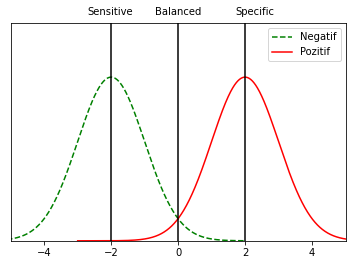

In [3]:
# source : Jeff Heaton, Applications of Deep Neural Networks

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mean1 = -2
mean2 = 2
variance = 1

sigma = math.sqrt(variance)

x1 = np.linspace(mean1 - 5 * sigma, mean1 + 4 * sigma, 1000)
x2 = np.linspace(mean2 - 5 * sigma, mean2 + 4 * sigma, 1000)

plt.plot(x1, stats.norm.pdf(x1, mean1, sigma), color='green', linestyle='dashed')
plt.plot(x2, stats.norm.pdf(x2, mean2, sigma), color='red')

plt.axvline(x=-2, color='black')
plt.axvline(x=-0, color='black')
plt.axvline(x=2, color='black')

plt.text(-2.7, 0.55, 'Sensitive')
plt.text(-0.7, 0.55, 'Balanced')
plt.text(1.7, 0.55, 'Specific')

plt.ylim([0, 0.53])
plt.xlim([-5, 5])
plt.legend(['Negatif', 'Pozitif'])
plt.yticks([])

<img src="senstivityspecifity.png"/>
<center>https://www.technologynetworks.com/analysis/articles/sensitivity-vs-specificity-318222</center>

Sonuçların kesin bir pozitif veya negatif yerine değişken bir değerler ölçeğinde verildiği durumlarda, duyarlılık ve özgüllük değerleri özellikle önemlidir. Bir sonucu pozitif veya negatif olarak adlandırmak için nerede kesitler çizileceğini belirlemeye veya hatta yeniden testin önerilebileceği gri bir alan önermeye izin verirler. Örneğin, pozitif bir sonucun sınırını çok düşük bir seviyeye (mor kesikli çizgi) konarak, tüm pozitif örnekler yakalanabilir ve bu nedenle test çok hassastır. Ancak bu, gerçekte negatif olan birçok örneğin pozitif olarak kabul edilebileceği anlamına gelebilir ve bu nedenle testin zayıf specificity'ye sahip olduğu kabul edilir. Bu nedenle, etkili ve kullanışlı bir test için bir denge bulmak çok önemlidir.</br>


In [3]:
X_col = df.columns.drop('diagnosis').drop('id')
X_col

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
       'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
       'se_fractal_dimension', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [8]:
from sklearn.preprocessing import MinMaxScaler

X = df[X_col].values
minmax = MinMaxScaler().fit(X)
X = minmax.transform(X)
y = df.diagnosis.map({'M':1, 'B':0}).values

In [21]:
X

array([[0.521 , 0.0227, 0.546 , ..., 0.912 , 0.5985, 0.4189],
       [0.6431, 0.2726, 0.6158, ..., 0.6392, 0.2336, 0.2229],
       [0.6015, 0.3903, 0.5957, ..., 0.8351, 0.4037, 0.2134],
       ...,
       [0.4553, 0.6212, 0.4458, ..., 0.4873, 0.1287, 0.1519],
       [0.6446, 0.6635, 0.6655, ..., 0.9107, 0.4971, 0.4523],
       [0.0369, 0.5015, 0.0285, ..., 0.    , 0.2574, 0.1007]])

In [22]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(25, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,
                       verbose=1, mode='auto', restore_best_weights=True)

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2,
         epochs=1000)

Epoch 1/1000
15/15 - 0s - loss: 0.6913 - accuracy: 0.6352 - val_loss: 0.6882 - val_accuracy: 0.7018
Epoch 2/1000
15/15 - 0s - loss: 0.6837 - accuracy: 0.7912 - val_loss: 0.6731 - val_accuracy: 0.8421
Epoch 3/1000
15/15 - 0s - loss: 0.6584 - accuracy: 0.8681 - val_loss: 0.6242 - val_accuracy: 0.9561
Epoch 4/1000
15/15 - 0s - loss: 0.5903 - accuracy: 0.8945 - val_loss: 0.5035 - val_accuracy: 0.9386
Epoch 5/1000
15/15 - 0s - loss: 0.4454 - accuracy: 0.9033 - val_loss: 0.3272 - val_accuracy: 0.9386
Epoch 6/1000
15/15 - 0s - loss: 0.3028 - accuracy: 0.8967 - val_loss: 0.2153 - val_accuracy: 0.9561
Epoch 7/1000
15/15 - 0s - loss: 0.2231 - accuracy: 0.9055 - val_loss: 0.1479 - val_accuracy: 0.9474
Epoch 8/1000
15/15 - 0s - loss: 0.1819 - accuracy: 0.9209 - val_loss: 0.1402 - val_accuracy: 0.9649
Epoch 9/1000
15/15 - 0s - loss: 0.1689 - accuracy: 0.9275 - val_loss: 0.1095 - val_accuracy: 0.9737
Epoch 10/1000
15/15 - 0s - loss: 0.1424 - accuracy: 0.9495 - val_loss: 0.0967 - val_accuracy: 0.9474

In [12]:
prediction = model.predict(X_test)

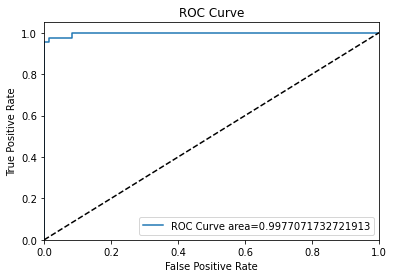

In [14]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

fpr, tpr, thrs = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve area={roc_auc}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

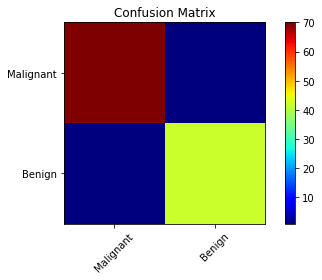

In [16]:
import numpy as np

prediction_new = (prediction >0.5)
cm = confusion_matrix(y_test, prediction_new)
names = ['Malignant', 'Benign']
plt.imshow(cm,interpolation='nearest', cmap='jet')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(names))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
plt.tight_layout()

In [18]:
accuracy_score(prediction_new, y_test)

0.9824561403508771

# Sınıflanırma Log Loss Hesaplama

Sinir ağları, hedef sınıfların her birinin bir olasılığını tahmin edebilir. Sinir ağları, daha olası tahminlere yüksek olasılıklar verir. Log Loss, yanlış cevaplarda güveni cezalandıran bir hata ölçüsüdür. Düşük Log Loss değeri istenir.

source: https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a

Log Loss,  bir sınıflandırma probleminin performansını değerlendirmek için en önemli ölçütlerden biridir. İkili sınıflandırma algoritmaları, önce sınıf 1 altında sınıflandırılacak bir kaydın olasılığını tahmin eder ve ardından olasılığın genellikle belirlenen bir eşik değerini geçip geçmediğine bağlı olarak veri noktasını (kaydı) iki sınıftan biri (1 veya 0) altında sınıflandırır. Bu eşik değer genellikle 0.5'dir.

<img src="logloss1.png" />

Log Loss, tahmin olasılığının karşılık gelen gerçek değere ne kadar yakın olduğunun göstergesidir (ikili sınıflandırma durumunda 0 veya 1). Tahmin edilen olasılık gerçek değerden ne kadar saparsa, log loss değeri o kadar yüksek olur. </br>

E-postalar için spam ve ham arasındaki sınıflandırma problemini olsun. Spam sınıfı 1 ve ham sınıf 0 olarak gösterilsin. Bir spam e-postayı (gerçek değer = 1) 1 olasılıkla spam olarak tahmin eden istatistiksel bir model oluşturulsun. Burada gözlemin tahminiyle ilişkili log loss değeri 0'dır ve hiçbir sapma / hata olmadığını gösterir. </b>

0.9 olasılıkla tahmin edilen başka bir spam e-posta için Log Loss değeri sıfırdan fazladır (tam olarak 0,105). </br>

Bir de ham e-posta için durumu açıklayalım. Model, 0.2 olasılıkla spam olarak tahmin etsin, bu da modelin onu ham olarak sınıflandıracağını söylemenin başka bir yoludur (varsayılan olasılık eşiği 0,5 varsayılırsa). Tahmin olasılığı ile 0 olan gerçek değer arasındaki mutlak fark (ham olduğu için) 0,2'dir. Tahminle ilişkili Log Loss değeri 0.223'tür. </br>

Burada dikkat edimesi gereken nokta, daha zayıf  bir tahminin log loss değerinin daha iyi bir tahmininkinden daha yüksek olmasıdır. </br>

Şimdi, 1.0, 0.7, 0.3, 0.009 ve 0.0001 gibi çok çeşitli olasılıklarla tahmin edilen 5 farklı spam e-postası olsun. Burada log loss değerinin üssel bir artış olduğu gözlemlenmektedir.

<img src="logloss2.png" />

0 ile 1 arasında olası tüm tahmin olasılıklarına sahip spam e-postaları tahmin edilseydi, grafik aşağıdaki gibi görünecektir. Gerçek 1 gözlemin tahmin olasılığı ne kadar düşükse, log kaybı değeri o kadar yüksek olur. 

<img src="logloss3.png" />

Benzer şekilde, geniş bir olasılık aralığında tahmin edilen ham e-postalar için, grafik yukarıdaki grafiğin bir ayna görüntüsü olarak aşağıdaki gibi görünecektir. Gerçek 0 gözlemin tahmin olasılığı ne kadar yüksekse, log kaybı değeri de o kadar yüksek olur. 

<img src="logloss4.png" />

Bir sınıflandırma modelini eğitirken, gözlemin gerçek değere (0 veya 1) mümkün olduğunca yakın bir olasılıkla tahmin edilmesi istenir. Bu nedenle, log loss, sınıflandırma modellerini eğitmek ve optimize etmek için bir kayıp işlevi olarak iyi bir seçimdir, burada tahmin olasılığı gerçek değerinden ne kadar uzakta olursa, tahmin cezalandırılır. </br>

<img src="logloss5.png" />

Burada i verilen gözlemin sırasını,  y gerçek değeri, p tahmin olasılığını göstermektedir.</br>

<img src="logloss6.png" />

<img src="logloss7.png" />

Mükemmel  bir modelin log loss değeri 0'dır. Diğer bir deyişle, model her bir gözlemin olasılığını gerçek değer olarak tahmin eder.

Bir regresyon problemi için ortalama hata karesi (MSE)  neyse bir sınıflandırma problemi için log loss skoru da odur. Her iki ölçüm de tahminlerin gerçek değerlerden ne kadar uzakta olduğunu göstererek tahmin sonuçlarının ne kadar iyi veya kötü olduğunu gösterir.</br>

<img src="logloss8.png" />

<img src="logloss9.png" />
<center>Kaynak : https://towardsdatascience.com/estimate-model-performance-with-log-loss-like-a-pro-9f47d13c8865</center>

<b>Veri Dengesiz Olduğu Zaman Ne yapılmalı</b>Kaynak : https://towardsdatascience.com/estimate-model-performance-with-log-loss-like-a-pro-9f47d13c8865 </br>

Bir çikolata kutusu içerisinde üç parça bitter çikolata ve yedi parça beyaz çikolata olsun. Bitter çikolata çıkarma şansı 50-50 değildir. </br>

Burada bitter çikolata seçme olasılığı, p = Pr (y = bitter) = 3/10 = 0.3 olur. bitter çikolata 1’lerle ve beyaz çikolatalar 0’larla değiştirilip aşağıdaki hesaplamalar yapılmıştır. </br>

<img src="logloss11.png" />
<center>5 Bitter 5 Beyaz Çikolata</center>
![image-2.png](attachment:image-2.png)
<img src="logloss10.png" />
<center>3 Bitter 7 Beyaz Çikolata</center>

<img src="logloss12.png" />
<center>3 Bitter 7 Beyaz Çikolata 10  Sütlü Çikolata</center>

Bu durumda aşağıdaki fonksiyon çalıştırılarak sonuçlar yorumlanmalıdır




In [27]:
from sklearn.metrics import log_loss

def calculate_log_loss(class_ratio,multi=10000):
    
    if sum(class_ratio)!=1.0:
        print("Uyarı: En iyi sonuç için oranlar toplamı 1 olmalıdır")
        class_ratio[-1]+=1-sum(class_ratio)  # add the residual to last class's ratio
    
    actuals=[]
    for i,val in enumerate(class_ratio):
        actuals=actuals+[i for x in range(int(val*multi))]

    preds=[]
    for i in range(multi):
        preds+=[class_ratio]
        
    return (log_loss(actuals, preds))

Yukarıda, sınıflarınızın oranlarının bir listesini girdi olarak alan ve rastgele bir tahmin log loss çıkaran bir python fonksiyonu yer almaktadır. Modelinizin log loss değeri bu sayıdan azsa, model doğrudur!

In [21]:
logloss=calculate_log_loss([.5,.5],multi=100)
logloss

0.6931471805599453

In [22]:
logloss=calculate_log_loss([.3,.7],multi=100)
logloss

0.6108643020548936

In [25]:
logloss=calculate_log_loss([.15,.35,.5],multi=100)
logloss

0.9985793315873923

In [20]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [14]:
prediction[0:5]

array([[0.4475],
       [0.992 ],
       [0.9778],
       [0.0053],
       [0.0077]], dtype=float32)

In [15]:
prediction[0] * 100

array([44.7461], dtype=float32)

In [19]:
from sklearn.metrics import log_loss
logloss_score = log_loss(y_test, prediction)
logloss_score

0.05822066246742496